In [1]:
import tensorflow as tf #used for implementing machine learning and data automation
import cv2
import os #module for working with directories
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array= cv2.imread("dataset\\Mask\\00000_Mask.jpg") #first image of the "mask" dataset

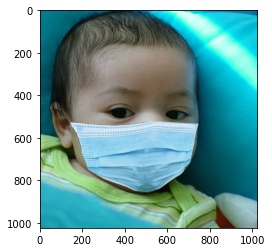

In [3]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [4]:
img_array.shape

(1024, 1024, 3)

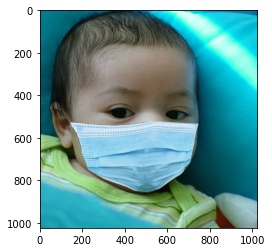

In [5]:
Datadirectory = "dataset/"##training dataset
Classes = ["Mask","No_Mask"]##list of classes
for category in Classes:
    path=os.path.join(Datadirectory, category) #for joining the Datadirectory path variable with category
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

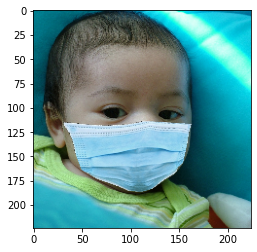

In [6]:
img_size= 224 ##Imagenet=> 224 x 224

new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

#reading the images and converting all to array

In [7]:
training_Data= [] #data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num= Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))##length of training data

In [ ]:
import random

random.shuffle(training_Data) #to randomly reorganize the training data

In [ ]:
X = []##data
y = [] ##label

for features, label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

In [ ]:
X= X/255.0; ##we are normalizing the data

In [ ]:
y[1000]

In [ ]:
Y= np.array(y) #to create numpy array object 'ndarray' using array()function

In [ ]:
import pickle    

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out) 
pickle_out.close()

pickle_out= open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

#deep learining model for training - (Transfer Learining)

In [ ]:
import tensorflow as tf
from tensorflow import keras #keras is used to make the implementation of neural networks easy
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()#pre_trained model

In [ ]:
model.summary()

#transfer learining- Tuning, weights will start from last checkpoint

In [ ]:
base_input= model.layers[0].input

In [ ]:
base_output = model.layers[-4].output##starting from last

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output= layers.Dense(1)(Flat_layer)##o, -1
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [ ]:
new_model.summary()##reduced parameters

# settings for binary classification (Face mask/ without mask)

In [ ]:
new_model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics =["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)#passes of the training dataset through the algorithm

In [ ]:
new_model.save('my_model3.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model3.h5')

#checking the network for predictions

In [ ]:
frame = cv2.imread('00002_Mask.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image, axis =0)##need fourth dimension
final_image = final_image/255.0 #normalizaton

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions##array will have negative value for mask

##checking the network for unknown image

In [ ]:
frame = cv2.imread('woman.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
##now we need to download haar cascade face detector
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#to quickly discard non-faces and avoid wasting precious time and computations
#it is 

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)##because in haar cascade detector there are faces only in gray scale

In [ ]:
gray.shape ##it will give only 2 dimensions as it is gray

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)##gives four corners of the face
for x,y,w,h in faces:
    roi_gray = gray[y: y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)##it puts a rectangle on the face for scanning it
    facess = faceCascade.detectMultiScale(roi_gray)
    
    if len(facess) == 0:
        print("Face not Detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew] #cropped face dimensions

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224, 224))##resizing
final_image = np.expand_dims(final_image, axis=0)##need fourth dimension
final_image = final_image/255.0

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions##array will have +ve value for no mask

##real time face mask detection

In [ ]:
import cv2

path = "haarcascade_frontalface_default.xml"
font_scale= 1.5
font = cv2.FONT_HERSHEY_PLAIN

#setting rectangle backround to white

rectangle_bgr = (255, 255, 255)
##make a black image

img = np.zeros((500, 500))
#set some text

text = "some text in a box!"
#get the width and height of the text box

(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness =1)[0]
##set the text start position

text_offset_x = 10
text_offset_y = img.shape[0] - 25

#make the coords of the box with a small padding of two pixels

box_coords = ((text_offset_x, text_offset_y), (text_offset_x+ text_width +2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale= font_scale, color= (0,0,0), thickness = 1)

cap = cv2. VideoCapture(1)

##check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Web-cam")
    
while True:
    ret,frame = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for x,y,w,h in faces:
        roi_gray = gray[y: y+h, x: x+w]
        roi_color = frame[y:y+h, x: x+w]
        cv2.rectangle (frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        
        if len(facess)==0:
            print("Face not Detected")
        
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
                
        final_image = cv2.resize(face_roi, (224,224))
        final_image = np.expand_dims(final_image, axis=0) 
        final_image= final_image/255.0
        
        font= cv2.FONT_HERSHEY_SIMPLEX
        
        Predictions = new_model.predict(final_image)
        
        font_scale = 1.5
        font = cv2.FONT_HERSHEY_PLAIN
        
        if (Predictions>0):
            status ="No Mask"
            
            x1,y1,w1,h1 =0,0,175,75
            
            #draw black backround rectangle
            
            cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
            #add text
            cv2.putText(frame, status, (x1+ int(w1/10),y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            
            cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
            
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
            
        else:
            status = "Face Mask"
            
            x1,y1,w1,h1 = 0,0,175,75
            
             #draw black backround rectangle
            
            cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
            #add text
          
            cv2.putText(frame, status, (x1+ int(w1/10),y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
            
            cv2.putText(frame, status, (100, 150), font, 3, (0,255,0), 2, cv2.LINE_4)
            
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
           
        
        cv2.imshow('Facemask detection program', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
    